<a href="https://colab.research.google.com/github/LostUniavan/PerceptronSimpleSigmoid/blob/main/PERCEPTRON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A saída de streaming foi truncada nas últimas 5000 linhas.
Epoch 162194, Erro: 0.010157233520099826
Epoch 162195, Erro: 0.010157201327288772
Epoch 162196, Erro: 0.010157169134780965
Epoch 162197, Erro: 0.01015713694257646
Epoch 162198, Erro: 0.01015710475067517
Epoch 162199, Erro: 0.01015707255907715
Epoch 162200, Erro: 0.010157040367782389
Epoch 162201, Erro: 0.010157008176790855
Epoch 162202, Erro: 0.010156975986102549
Epoch 162203, Erro: 0.010156943795717467
Epoch 162204, Erro: 0.01015691160563561
Epoch 162205, Erro: 0.01015687941585702
Epoch 162206, Erro: 0.010156847226381613
Epoch 162207, Erro: 0.010156815037209398
Epoch 162208, Erro: 0.010156782848340408
Epoch 162209, Erro: 0.010156750659774661
Epoch 162210, Erro: 0.010156718471512064
Epoch 162211, Erro: 0.01015668628355266
Epoch 162212, Erro: 0.010156654095896446
Epoch 162213, Erro: 0.010156621908543433
Epoch 162214, Erro: 0.010156589721493553
Epoch 162215, Erro: 0.010156557534746898
Epoch 162216, Erro: 0.010156525348303427
Epoc

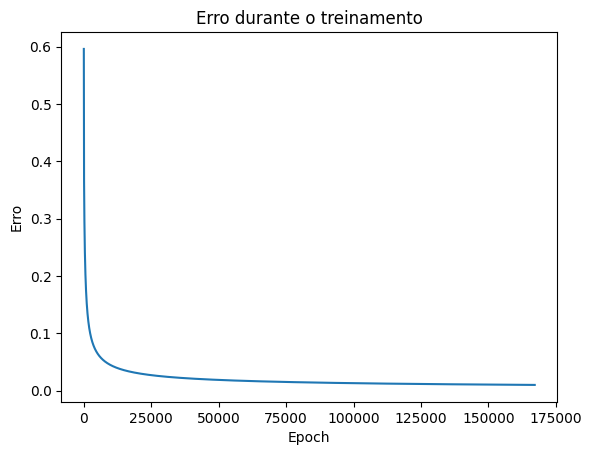


Resultados após o treinamento:
Entrada: [0 0], Saída esperada: [0], Saída prevista: [2.44335722e-06]
Entrada: [0 1], Saída esperada: [0], Saída prevista: [0.01255936]
Entrada: [1 0], Saída esperada: [0], Saída prevista: [0.01255936]
Entrada: [1 1], Saída esperada: [1], Saída prevista: [0.98512131]


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# operador AND
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([[0], [0], [0], [1]])

# operador OR
#inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
#outputs = np.array([[0], [1], [1], [1]])

# operador XOR (não aprende)
#inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
#outputs = np.array([[0], [1], [1], [0]])

np.random.seed(42)
weights = np.random.rand(2, 1)
bias = np.random.rand(1)

learning_rate = 0.1
error_threshold = 0.01

errors = []

epoch = 0
while True:
    input_layer = inputs
    weighted_sum = np.dot(input_layer, weights) + bias
    activated_output = sigmoid(weighted_sum)

    error = outputs - activated_output
    mean_error = np.mean(np.abs(error))
    errors.append(mean_error)

    adjustments = error * sigmoid_derivative(activated_output)
    weights += np.dot(input_layer.T, adjustments) * learning_rate
    bias += np.sum(adjustments) * learning_rate

    print(f"Epoch {epoch}, Erro: {mean_error}")

    if mean_error < error_threshold:
        break

    epoch += 1

plt.plot(errors)
plt.xlabel('Epoch')
plt.ylabel('Erro')
plt.title('Erro durante o treinamento')
plt.show()

print("\nResultados após o treinamento:")
for i in range(len(inputs)):
    input_data = inputs[i]
    result = sigmoid(np.dot(input_data, weights) + bias)
    print(f"Entrada: {input_data}, Saída esperada: {outputs[i]}, Saída prevista: {result}")